# M5 - W1 Assignment: Visualising the Right Way!

# PART I

In [8]:
#importing  numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [53]:
#Create a numpy array x with 1000 values ranging from -10 to 10. Create another numpy array y with 1000 values ranging from -10 to 10.
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)


In [27]:
#Define a function z_func that takes in two arguments x and y and returns a numpy array of the same shape as x and y. The function should use the equation z = sin(sqrt(x^2 + y^2)) / sqrt(x^2 + y^2). Use x and y as inputs to the z_func function to create a numpy array z.
def z_func(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2)

z = z_func(x, y)

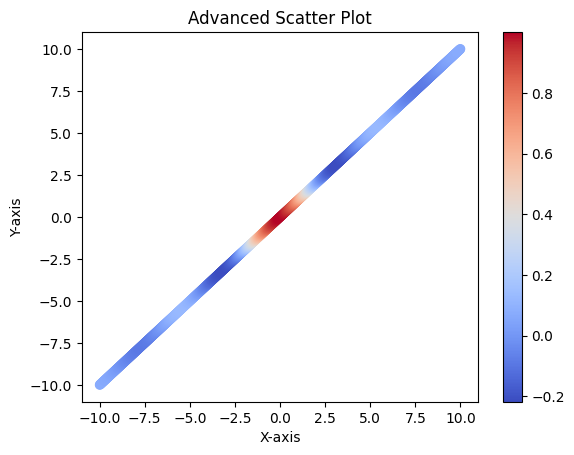

In [26]:
# Use matplotlib to create a 2D scatter plot of x and y. Use the scatter() function to create the plot, and set the c parameter to z to color the markers based on the value of z. Use the cmap parameter to specify the colormap to use, and set it to 'coolwarm'. Add a colorbar to the plot using the colorbar() function. Set the title of the plot to "Advanced Scatter Plot", and set the x and y axis labels to "X-axis" and "Y-axis", respectively.
ax,fig=plt.subplots()
plt.scatter(x, y, c=z, cmap='coolwarm')
plt.colorbar()
plt.title("Advanced Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
#plt.show()
#Save the plot as a PNG image named "advanced_scatter_plot.png" with a resolution of 300 DPI.
plt.savefig('advanced_scatter_plot.png', dpi=300)
plt.savefig('advanced_scatter_plot.png',dpi=300)

# PART II

2) We take data visualisation seriously.  With every single one, we as data scientists, try our best to visualise the numbers accurately and in a way that best supports our goals. But sometimes we get it wrong. We can do better in future if we learn from our mistakes . Now, take a look at the two visualisations below about public opinion on Britain's decision to leave the EU. The one on the left represents a not-so-good visualisation while the right one does a better job.

### 1- First, explain thoroughly which one you think is better; the left or the right. And why! 

I believe that the second graph is better as it clearly indicates when the trend changed for voting. If the goal is to check trend, then second one is better , but if we have to look for specific details then first one may come handy

In [36]:
import pandas as pd
df=pd.read_csv('/Users/apple/Desktop/brexit.csv')
df.head()




,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Source: NatCen Social Research,NaN,NaN
1,NaN,NaN,NaN
2,Date,% responding right,% responding wrong
3,02/08/16,46,42
4,09/08/16,45,44


In [37]:
df.drop(index=[0,1,2],inplace=True)
df.reset_index(inplace=True)
df.pop('index')
df.rename(columns={'Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?':'date',
                   'Unnamed: 1':'right',
                   'Unnamed: 2':'wrong'},
                   inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    85 non-null     object
 1   right   85 non-null     object
 2   wrong   85 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [39]:
df['right']=df['right'].astype(int)
df['wrong']=df['wrong'].astype(int)
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    85 non-null     datetime64[ns]
 1   right   85 non-null     int64         
 2   wrong   85 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 KB


/var/folders/z6/8ljjr55d7sz134qq90v8c1xh0000gp/T/ipykernel_60669/2773633111.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


In [40]:
df.set_index('date',inplace=True)
df=df[df.index<='2018-06-01']

In [41]:
df=df.sort_index()


In [477]:
df['year']=df.index.year+df.index.month/12+df.index.day/365

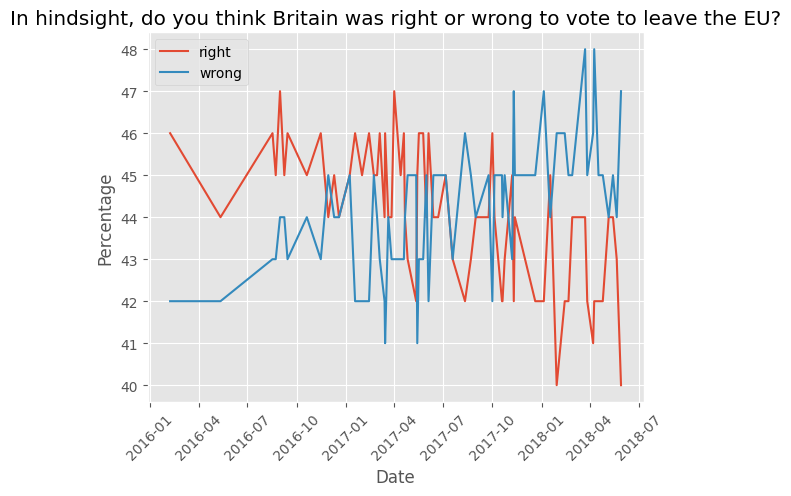

In [43]:
fig, ax = plt.subplots()
plt.style.use('ggplot')

ax.plot(df.index, df['right'], label='right')
ax.plot(df.index, df['wrong'], label='wrong')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
plt.title('In hindsight, do you think Britain was right or wrong to vote to leave the EU?')
ax.annotate("RIGHT",xy=(pd.Timestamp('2018-03-27'), 1),xytext=(pd.Timestamp('2018-03-27'),-0.2),arrowprops={})
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

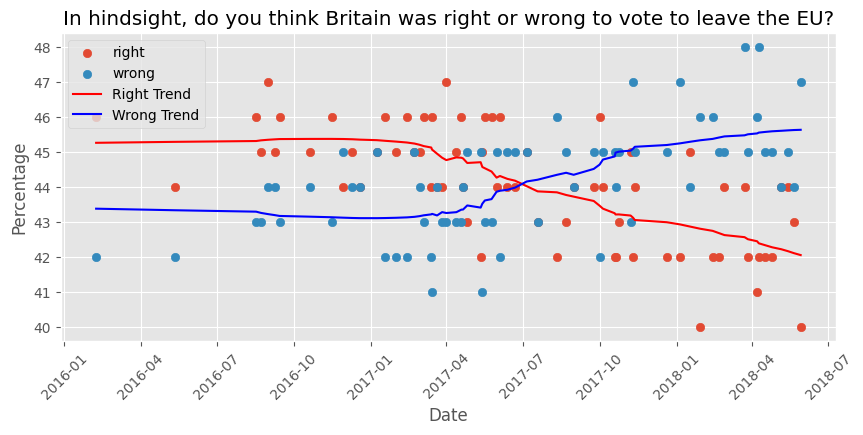

In [50]:
from scipy.signal import savgol_filter
window_size = 40
smoothed_right = savgol_filter(df['right'], window_size, 2)  
smoothed_wrong = savgol_filter(df['wrong'], window_size, 2)
fig, ax = plt.subplots(figsize=(10, 4))
plt.style.use('ggplot')
ax.scatter(df.index, df['right'], label='right')
ax.scatter(df.index, df['wrong'], label='wrong')
ax.plot(df.index, smoothed_right, color='red', label='Right Trend')
ax.plot(df.index, smoothed_wrong, color='blue', label='Wrong Trend')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
plt.title('In hindsight, do you think Britain was right or wrong to vote to leave the EU?')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
